# PRACTICA 4: REDES BAYESIANAS

In [32]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import pylab as plt
import networkx as nx

## Ejercicio 1

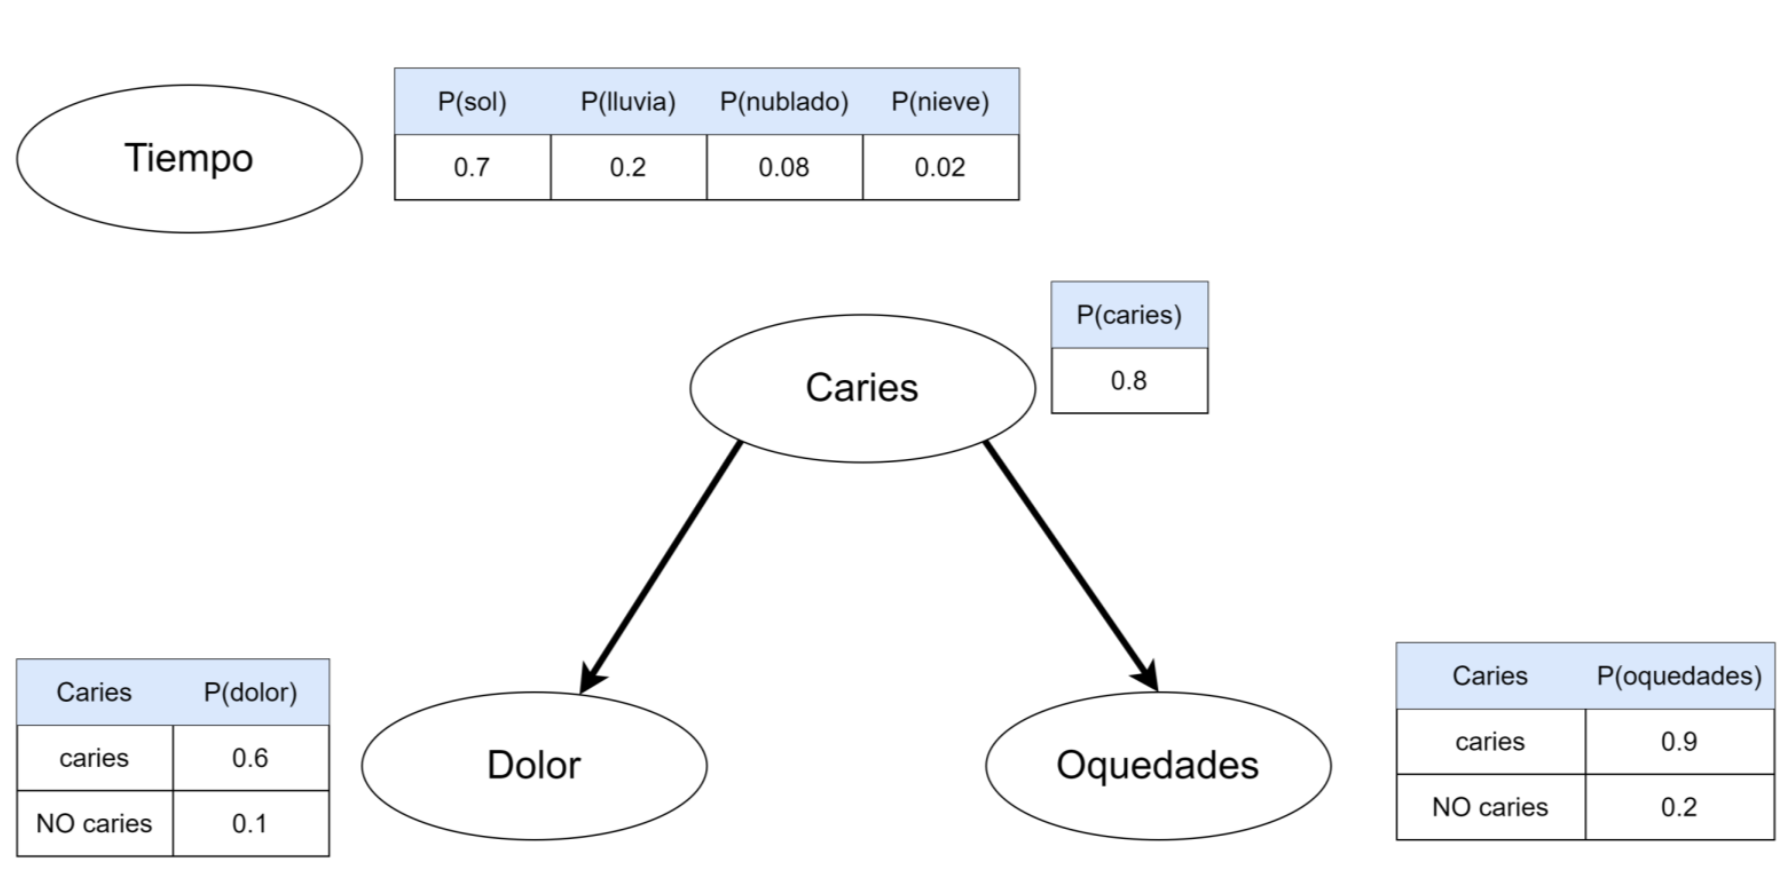

In [2]:
from IPython.display import Image
Image(filename="C:\\Users\\valko\\PycharmProjects\\IACD-Practica4\\images\\Ejercicio 1.png", width=300, height=100) 

In [43]:

model = BayesianNetwork([("Caries", "Dolor"), ("Caries", "Oquedades")])
cpd_oquedades = TabularCPD(variable="Oquedades", 
                           variable_card=2, 
                           values=[[0.9, 0.2], 
                                   [0.1, 0.8]], 
                           evidence=["Caries"], 
                           evidence_card=[2])
cpd_dolor = TabularCPD(variable="Dolor", 
                       variable_card=2, 
                       values=[[0.6, 0.1], 
                               [0.4, 0.9]], 
                       evidence=["Caries"], 
                       evidence_card=[2])
cpd_caries = TabularCPD(variable="Caries", 
                        variable_card=2, 
                        values=[[0.8], [0.2]])
model.add_node("Tiempo")
cpd_tiempo = TabularCPD(variable="Tiempo", 
                        variable_card=4, 
                        values=[[0.7],
                                [0.2],
                                [0.08],
                                [0.02]],
                        evidence=[],
                        evidence_card=[])
model.add_cpds(cpd_caries, cpd_dolor, cpd_oquedades, cpd_tiempo)
model.check_model()

True

In [5]:
# Preparamos el solucioinador
solver = VariableElimination(model)

• Probabilidad de padecer caries si tenemos oquedades.

In [6]:
result = solver.query(variables=['Caries'], evidence={'Oquedades': 0})
print("P(C|O)", result)

P(C|O) +-----------+---------------+
| Caries    |   phi(Caries) |
+===========+===============+
| Caries(0) |        0.9474 |
+-----------+---------------+
| Caries(1) |        0.0526 |
+-----------+---------------+


• Probabilidad de padecer caries.

In [7]:
result = solver.query(variables=['Caries'])
print("P(C)", result)

P(C) +-----------+---------------+
| Caries    |   phi(Caries) |
+===========+===============+
| Caries(0) |        0.8000 |
+-----------+---------------+
| Caries(1) |        0.2000 |
+-----------+---------------+


• Probabilidad de no padecer caries si tenemos oquedades y dolor.

In [8]:
result = solver.query(variables=['Caries'], evidence={'Oquedades': 0, 'Dolor': 0})
print("P(!C|O,D)", result)

P(!C|O,D) +-----------+---------------+
| Caries    |   phi(Caries) |
+===========+===============+
| Caries(0) |        0.9908 |
+-----------+---------------+
| Caries(1) |        0.0092 |
+-----------+---------------+


• Probabilidad de tener oquedades.

In [9]:
result = solver.query(variables=['Oquedades'])
print("P(O)", result)

P(O) +--------------+------------------+
| Oquedades    |   phi(Oquedades) |
+==============+==================+
| Oquedades(0) |           0.7600 |
+--------------+------------------+
| Oquedades(1) |           0.2400 |
+--------------+------------------+


## Ejercicio 2

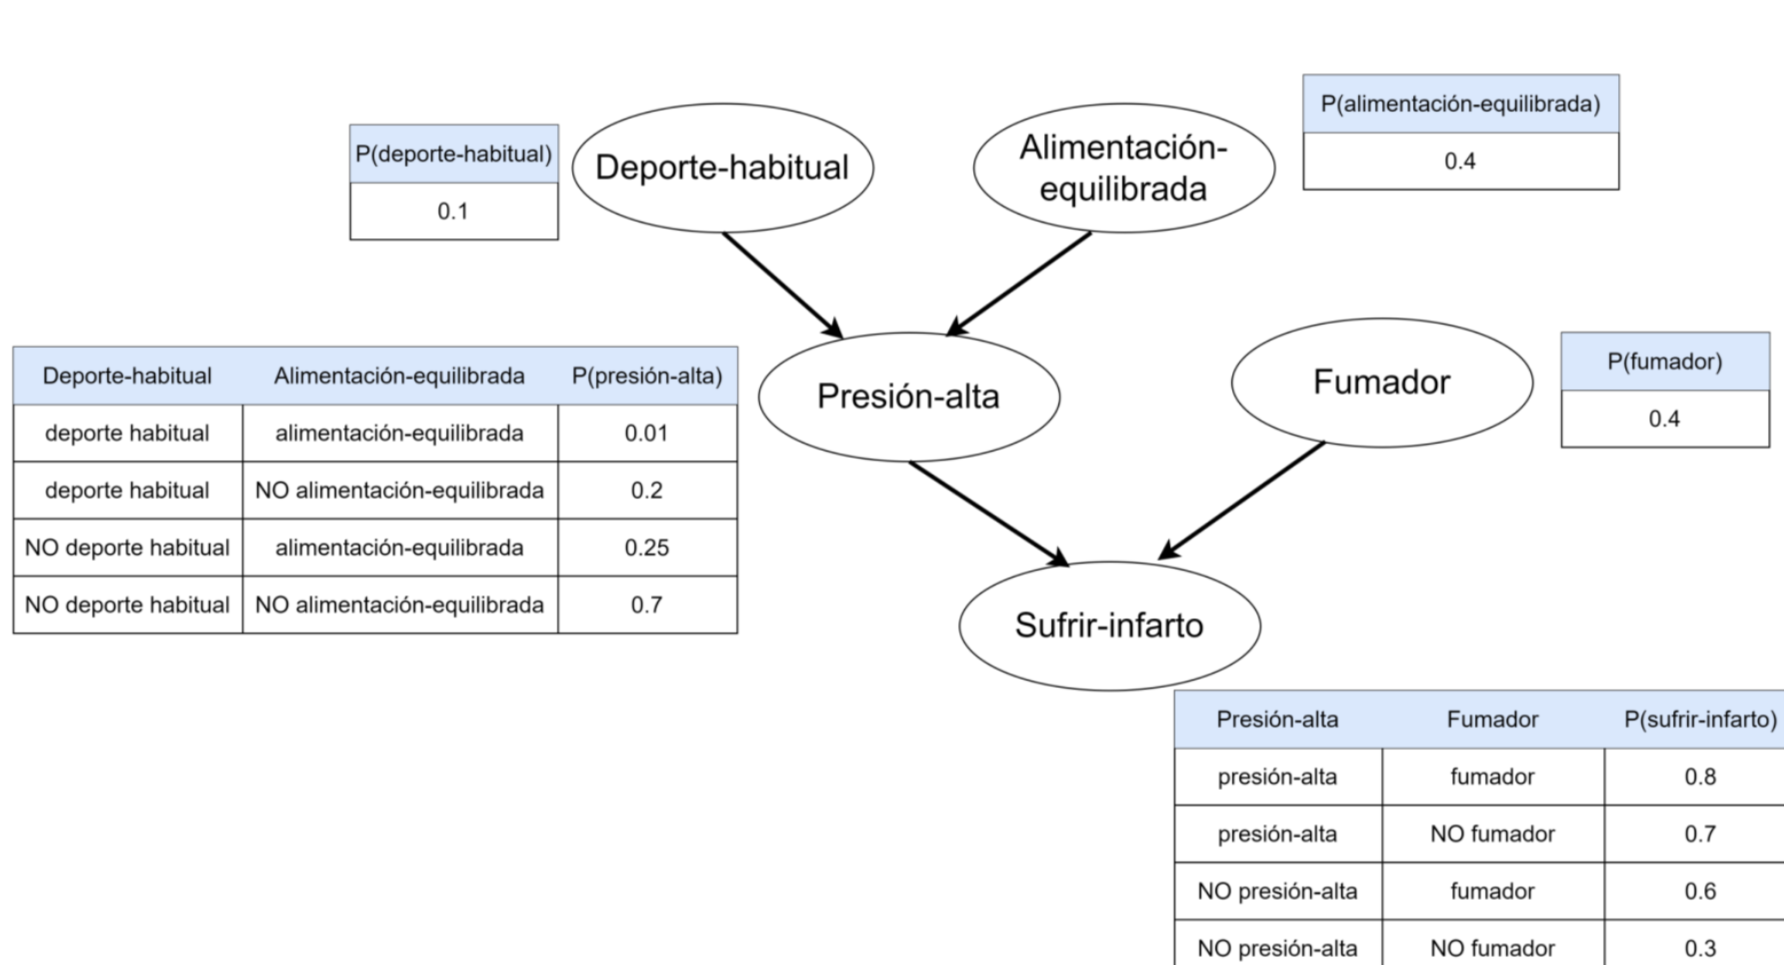

In [1]:
from IPython.display import Image
Image(filename="C:\\Users\\valko\\PycharmProjects\\IACD-Practica4\\images\\Ejercicio 2.png")

In [46]:
model = BayesianNetwork([("Deporte-habitual", "Presión-alta"), 
                         ("Alimentacion-equilibrada", "Presión-alta"), 
                         ("Presión-alta", "Sufrir-infarto"), 
                         ("Fumador", "Sufrir-infarto")])

cpd_deporte_habitual = TabularCPD(variable="Deporte-habitual", 
                                  variable_card=2, 
                                  values=[[0.1], [0.9]])

cpd_alimentacion_equilibrada = TabularCPD(variable="Alimentacion-equilibrada", 
                                          variable_card=2, 
                                          values=[[0.4], [0.6]])

cpd_presion_alta = TabularCPD(variable="Presión-alta", 
                              variable_card=2, 
                              values=[[0.01, 0.2, 0.25, 0.7], 
                                      [0.99, 0.8, 0.75, 0.3]], 
                              evidence=["Deporte-habitual", "Alimentacion-equilibrada"], 
                              evidence_card=[2, 2])

cpd_fumador = TabularCPD(variable="Fumador", 
                         variable_card=2, 
                         values=[[0.4], [0.6]])

cpd_sufrir_infarto = TabularCPD(variable="Sufrir-infarto", 
                                variable_card=2, 
                                values=[[0.8, 0.7, 0.6, 0.3], 
                                        [0.2, 0.3, 0.4, 0.7]], 
                                evidence=["Presión-alta", "Fumador"], 
                                evidence_card=[2, 2])

model.add_cpds(cpd_deporte_habitual, cpd_alimentacion_equilibrada, cpd_presion_alta, cpd_fumador, cpd_sufrir_infarto)
model.check_model()

+--------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+
| Deporte-habitual         | Deporte-habitual(0)         | Deporte-habitual(0)         | Deporte-habitual(1)         | Deporte-habitual(1)         |
+--------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+
| Alimentacion-equilibrada | Alimentacion-equilibrada(0) | Alimentacion-equilibrada(1) | Alimentacion-equilibrada(0) | Alimentacion-equilibrada(1) |
+--------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+
| Presión-alta(0)          | 0.01                        | 0.2                         | 0.25                        | 0.7                         |
+--------------------------+-----------------------------+-----------------------------+------------------

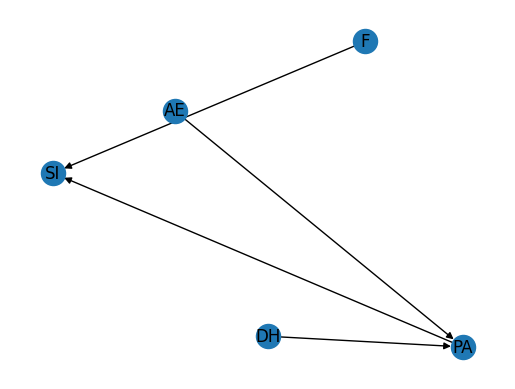

In [47]:
ax = plt.subplot()
identifier_mapping = {'Sufrir-infarto': 'SI',
                      'Presión-alta': 'PA',
                      'Fumador': 'F',
                      'Deporte-habitual': 'DH',
                      'Alimentacion-equilibrada': 'AE'}
nx_graph = nx.relabel_nodes(model, identifier_mapping)
nx.draw(nx_graph, ax=ax, with_labels=True, pos=nx.random_layout(nx_graph))
plt.show()

Probabilidad del resto de variables aleatorias dado que se ha sufrido un infarto.

In [48]:
# Preparamos el solucionador
solver = VariableElimination(model)
result = solver.query(variables=['Fumador'], evidence={"Sufrir-infarto": 0})
print("P(F|SI)", result)

P(F|SI) +------------+----------------+
| Fumador    |   phi(Fumador) |
+============+================+
| Fumador(0) |         0.4853 |
+------------+----------------+
| Fumador(1) |         0.5147 |
+------------+----------------+


In [49]:
result = solver.query(variables=['Presión-alta'], evidence={"Sufrir-infarto": 0})
print("P(PA|SI)", result)

P(PA|SI) +-----------------+---------------------+
| Presión-alta    |   phi(Presión-alta) |
+=================+=====================+
| Presión-alta(0) |              0.6196 |
+-----------------+---------------------+
| Presión-alta(1) |              0.3804 |
+-----------------+---------------------+


In [50]:
result = solver.query(variables=['Alimentacion-equilibrada'], evidence={"Sufrir-infarto": 0})
print("P(AE|SI)", result)

P(AE|SI) +-----------------------------+---------------------------------+
| Alimentacion-equilibrada    |   phi(Alimentacion-equilibrada) |
+=============================+=================================+
| Alimentacion-equilibrada(0) |                          0.3432 |
+-----------------------------+---------------------------------+
| Alimentacion-equilibrada(1) |                          0.6568 |
+-----------------------------+---------------------------------+


In [51]:
result = solver.query(variables=['Deporte-habitual'], evidence={"Sufrir-infarto": 0})
print("P(DH|SI)", result)

P(DH|SI) +---------------------+-------------------------+
| Deporte-habitual    |   phi(Deporte-habitual) |
+=====================+=========================+
| Deporte-habitual(0) |                  0.0801 |
+---------------------+-------------------------+
| Deporte-habitual(1) |                  0.9199 |
+---------------------+-------------------------+


## Ejercicio 3

In [24]:
model = BayesianNetwork([("Averia-mecanica", "Temperatura"), ("Averia-electrica", "Temperatura"), ("Averia-mecanica", "Piloto"), ("Averia-electrica", "Piloto")])

cpd_AM = TabularCPD(variable="Averia-mecanica",
                                  variable_card=2,
                                  values=[[0.00005], [0.99995]])
cpd_AE = TabularCPD(variable="Averia-electrica",
                                  variable_card=2,
                                  values=[[0.001], [0.999]])
cpd_P = TabularCPD(variable="Piloto",
                                  variable_card=2,
                                  values=[[0, 0.99, 0, 0.000001],
                                          [1, 0.01, 1, 0.999999]],
                                  evidence=["Averia-mecanica", "Averia-electrica"],
                                  evidence_card=[2, 2])
cpd_T = TabularCPD(variable="Temperatura",
                    variable_card=3,
                    values=[[1, 0.09, 0.5, 0.78],
                            [0, 0.01, 0.4, 0.05], 
                            [0, 0.9, 0.1, 0.17]],
                    evidence=["Averia-mecanica", "Averia-electrica"],
                    evidence_card=[2, 2])
model.add_cpds(cpd_AM, cpd_AE, cpd_P, cpd_T)
model.check_model()
print(cpd_P)

+------------------+---------------------+---------------------+---------------------+---------------------+
| Averia-mecanica  | Averia-mecanica(0)  | Averia-mecanica(0)  | Averia-mecanica(1)  | Averia-mecanica(1)  |
+------------------+---------------------+---------------------+---------------------+---------------------+
| Averia-electrica | Averia-electrica(0) | Averia-electrica(1) | Averia-electrica(0) | Averia-electrica(1) |
+------------------+---------------------+---------------------+---------------------+---------------------+
| Piloto(0)        | 0.0                 | 0.99                | 0.0                 | 1e-06               |
+------------------+---------------------+---------------------+---------------------+---------------------+
| Piloto(1)        | 1.0                 | 0.01                | 1.0                 | 0.999999            |
+------------------+---------------------+---------------------+---------------------+---------------------+


Si se enciende el piloto y la temperatura está por debajo de su valor normal, efectuar el diagnóstico del motor

In [26]:
solver = VariableElimination(model)
result = solver.query(variables=['Averia-mecanica', 'Averia-electrica'], evidence={"Piloto": 0, "Temperatura": 1})
print("P(AM|P, TR)", result)

P(AM|P, TR) +--------------------+---------------------+-----------------------------------------+
| Averia-mecanica    | Averia-electrica    |   phi(Averia-mecanica,Averia-electrica) |
+====================+=====================+=========================================+
| Averia-mecanica(0) | Averia-electrica(0) |                                  0.0000 |
+--------------------+---------------------+-----------------------------------------+
| Averia-mecanica(0) | Averia-electrica(1) |                                  0.9083 |
+--------------------+---------------------+-----------------------------------------+
| Averia-mecanica(1) | Averia-electrica(0) |                                  0.0000 |
+--------------------+---------------------+-----------------------------------------+
| Averia-mecanica(1) | Averia-electrica(1) |                                  0.0917 |
+--------------------+---------------------+-----------------------------------------+
